Антонов Егор, БПМ-214 \
Вариант №1

**Задача №4.1.1** Найти с точностью $ \varepsilon = 10^{-6} $ все корни системы нелинейных уравнений
$$
\begin{cases}
    \sin{\left(x_1 + x_2 \right)} - x_2 - 1.2 = 0, \\
    2 x_1 + \cos{\left(x_2 \right)} - 2 = 0,
\end{cases}
$$
используя метод Ньютона для системы нелинейных уравнений.

In [110]:
import numpy as np
import matplotlib.pyplot as plt

In [111]:
def f_1(x_1, x_2):
    return np.sin(x_1 + x_2) - x_2 - 1.2

def f_2(x_1, x_2):
    return 2 * x_1 + np.cos(x_2) - 2

1. Используя встроенные функции, локализовать корни системы уравнений графически.

In [112]:
def g_1(x):
    return np.arcsin(x + 1.2) - x

def g_2(x):
    return 1 - np.cos(x) / 2

In [113]:
y_range = np.arange(-2.1, -0.3, 0.001)
x_1_range = g_1(y_range)
x_2_range = g_2(y_range)

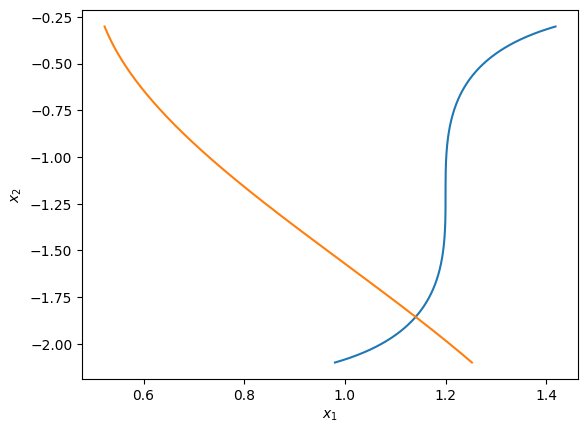

In [114]:
plt.plot(x_1_range, y_range)
plt.plot(x_2_range, y_range)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

2. Написать программу-функцию, вычисляющую корень системы двух нелинейных уравнений по методу
Ньютона с точностью $ \varepsilon = 10^{-6} $. Предусмотреть подсчет количества итераций. Для решения соответствующей системы
линейных алгебраических уравнений использовать встроенную функцию.

$$ \frac{\partial{f_1}}{\partial{x_1}} = \cos{\left(x_1 + x_2\right)} $$
$$ \frac{\partial{f_1}}{\partial{x_2}} = \cos{\left(x_1 + x_2\right)} - 1 $$
$$ \frac{\partial{f_2}}{\partial{x_1}} = 2 $$
$$ \frac{\partial{f_2}}{\partial{x_2}} = -\sin{\left(x_2\right)} $$

$$
J = 
\begin{pmatrix}
    \frac{\partial{f_1}}{\partial{x_1}} & \frac{\partial{f_1}}{\partial{x_2}} \\
    \frac{\partial{f_2}}{\partial{x_1}} & \frac{\partial{f_2}}{\partial{x_2}}
\end{pmatrix} = 
\begin{pmatrix}
    \cos{\left(x_1 + x_2\right)} & \cos{\left(x_1 + x_2\right)} - 1 \\
    2 & -\sin{\left(x_2\right)}
\end{pmatrix}
$$

In [115]:
def J(x: np.ndarray) -> np.ndarray:
    x_1 = x[0]
    x_2 = x[1]
    return np.array([[np.cos(x_1 + x_2), np.cos(x_1 + x_2) - 1], [2, -np.sin(x_2)]])

In [116]:
def F(x: np.ndarray) -> np.ndarray:
    x_1 = x[0]
    x_2 = x[1]
    return np.array([f_1(x_1, x_2), f_2(x_1, x_2)])

In [117]:
def NewtonMethod(x_0, epsilon):
    x = x_0 - np.dot(np.linalg.inv(J(x_0)), F(x_0))
    while (np.linalg.norm(x - x_0) >= epsilon):
        x_0 = np.copy(x)
        x = x_0 - np.dot(np.linalg.inv(J(x_0)), F(x_0))
    return x

3. Используя написанную программу, вычислить все корни заданной системы с точностью $ \varepsilon $.

In [118]:
x_0 = np.array([1.1, -1.75])
x_0 = NewtonMethod(x_0, 1e-6)

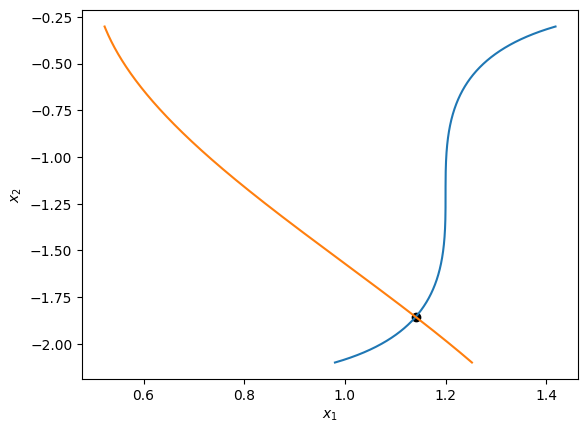

In [119]:
plt.plot(x_1_range, y_range)
plt.plot(x_2_range, y_range)
plt.scatter(x_0[0], x_0[1], c='black')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

**Задача №4.2.1** Локализовать корни системы уравнений
$$
\begin{cases}
    x_1^2 - x_2 + \alpha = 0, \\
    -x_1 + x_2^2 + \alpha = 0, \\
\end{cases}
$$
при значениях параметра $ \alpha \in \left\{ -2, 0, 1 \right\} $. Уточнить их с точностью $ \varepsilon = 10^{-6} $, используя упрощенный метод Ньютона для решения системы нелинейных уравнений.

In [79]:
a = -2

In [85]:
def f_1(x):
    return x[0]**2 - x[1] + a

def f_2(x):
    return -x[0] + x[1]**2 + a

def F(x):
    return np.array([f_1(x), f_2(x)])

In [81]:
def g_1(x):
    return np.power(x, 2) + a

def g_2(y):
    return np.power(y, 2) + a

In [82]:
x_1 = np.arange(-2, 2, 0.001)
y_1 = g_1(x_1)
y_2 = np.arange(-2, 2, 0.001)
x_2 = g_2(y_2)

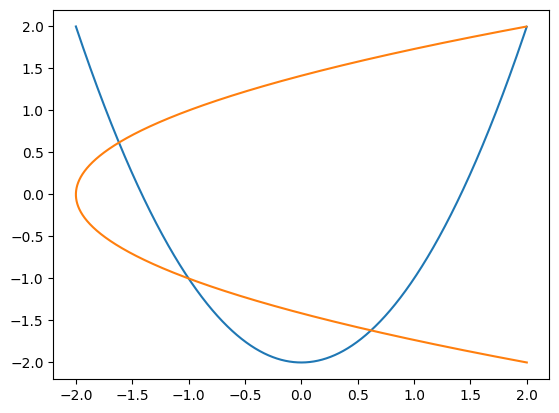

In [83]:
plt.plot(x_1, y_1)
plt.plot(x_2, y_2)
plt.show()

In [7]:
def J(x):
    return np.array([[2 * x[0], -1], [-1, 2 * x[1]]])

In [8]:
def NewtonMethod(x_0, epsilon):
    x = x_0 - np.dot(np.linalg.inv(J(x_0)), F(x_0))
    while (np.linalg.norm(x - x_0) >= epsilon):
        x_0 = np.copy(x)
        x = x_0 - np.dot(np.linalg.inv(J(x_0)), F(x_0))
    return x

In [97]:
x_0 = np.array([2, 2])
r_1 = NewtonMethod(x_0, 1e-6)

x_0 = np.array([-1.5, 0.5])
r_2 = NewtonMethod(x_0, 1e-6)

x_0 = np.array([0.5, -1.5])
r_3 = NewtonMethod(x_0, 1e-6)

x_0 = np.array([-1, -1])
r_4 = NewtonMethod(x_0, 1e-6)

print(r_1, r_2, r_3, r_4)

[2. 2.] [-1.61803399  0.61803399] [ 0.61803399 -1.61803399] [-1. -1.]


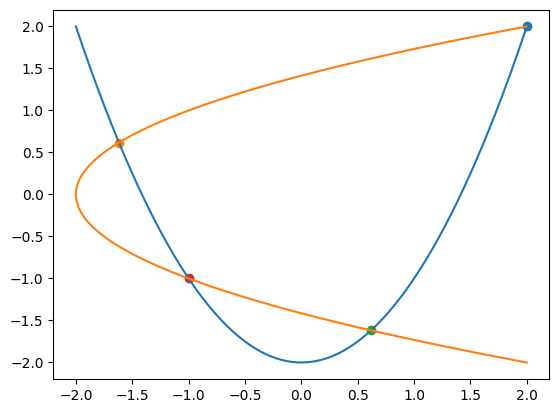

In [98]:
plt.plot(x_1, y_1)
plt.plot(x_2, y_2)
plt.scatter(r_1[0], r_1[1])
plt.scatter(r_2[0], r_2[1])
plt.scatter(r_3[0], r_3[1])
plt.scatter(r_4[0], r_4[1])
plt.show()

In [15]:
a = 0

In [16]:
def f_1(x):
    return x[0]**2 - x[1] + a

def f_2(x):
    return -x[0] + x[1]**2 + a

def F(x):
    return np.array([f_1(x), f_2(x)])

In [17]:
def g_1(x):
    return np.power(x, 2) + a

def g_2(y):
    return np.power(y, 2) + a

In [18]:
x_1 = np.arange(-2, 2, 0.001)
y_1 = g_1(x_1)
y_2 = np.arange(-2, 2, 0.001)
x_2 = g_2(y_2)

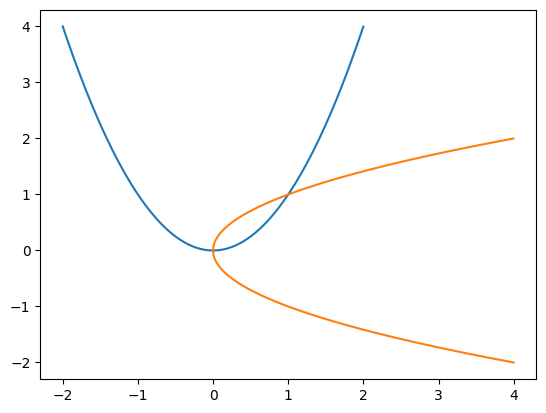

In [19]:
plt.plot(x_1, y_1)
plt.plot(x_2, y_2)
plt.show()

In [ ]:
def NewtonMethod(x_0, epsilon):
    x = x_0 - np.dot(np.linalg.inv(J(x_0)), F(x_0))
    while (np.linalg.norm(x - x_0) >= epsilon):
        x_0 = np.copy(x)
        x = x_0 - np.dot(np.linalg.inv(J(x_0)), F(x_0))
    return x

In [20]:
x_0 = np.array([0, 0])
r_1 = NewtonMethod(x_0, 1e-6)

x_0 = np.array([1, 1])
r_2 = NewtonMethod(x_0, 1e-6)

print(r_1, r_2)

[0. 0.] [1. 1.]


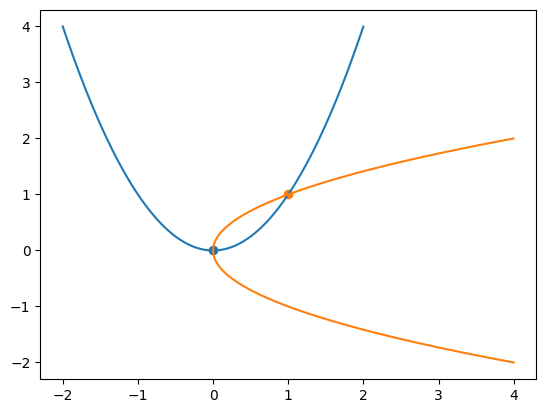

In [21]:
plt.plot(x_1, y_1)
plt.plot(x_2, y_2)
plt.scatter(r_1[0], r_1[1])
plt.scatter(r_2[0], r_2[1])
plt.show()

In [10]:
a = 1

In [11]:
def f_1(x):
    return x[0]**2 - x[1] + a

def f_2(x):
    return -x[0] + x[1]**2 + a

def F(x):
    return np.array([f_1(x), f_2(x)])

In [12]:
def g_1(x):
    return np.power(x, 2) + a

def g_2(y):
    return np.power(y, 2) + a

In [13]:
x_1 = np.arange(-2, 2, 0.001)
y_1 = g_1(x_1)
y_2 = np.arange(-2, 2, 0.001)
x_2 = g_2(y_2)

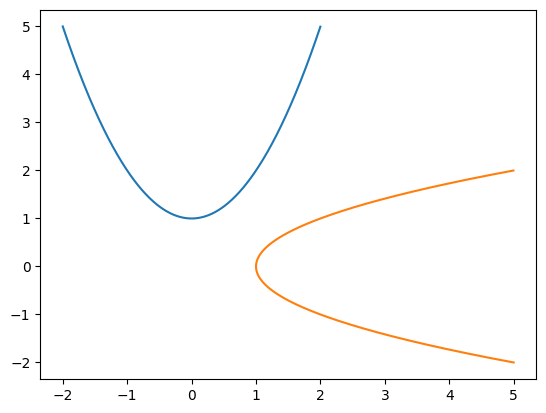

In [14]:
plt.plot(x_1, y_1)
plt.plot(x_2, y_2)
plt.show()

**Задача №5.1.1** Дана система уравнений $ Ax=b $. Найти решение системы с помощью метода Гаусса. Выполнить 10
итераций по методу Зейделя. Принимая решение, полученное с помощью метода Гаусса за точное, найти величину абсолютной погрешности итерационного решения.

$$
A = 
\begin{pmatrix}
    79.2 & 0 & 35 & 19.8 & 24 \\
    39.6 & 85 & 0 & 19.8 & 25 \\
    19.8 & -15 & 45 & 0 & 10 \\
    49.5 & 18 & 20 & 89.1 & 0 \\
    9.9 & 15 & 20 & -49.5 & 95
\end{pmatrix}, \, 
b = 
\begin{pmatrix}
    86 \\
    55 \\
    77 \\
    5 \\
    -64
\end{pmatrix}
$$

1. Задать матрицу системы $A$ и вектор правой части $b$. Найти решение системы $Ax=b$ с помощью метода Гаусса. 

In [4]:
import numpy as np

In [5]:
A = np.array([[79.2, 0, 35, 19.8, 24],
              [39.6, 85, 0, 19.8, 25],
              [19.8, -15, 45, 0, 10],
              [49.5, 18, 20, 89.1, 0],
              [9.9, 15, 20, -49.5, 95]])
b = np.array([86, 55, 77, 5, -64])

In [6]:
x_gauss = np.linalg.solve(A, b)
print(x_gauss)

[ 1.11111111  1.          2.         -1.21212121 -2.        ]


2. Преобразовать систему $Ax=b$ к виду $x=Bx+c$, удобному для итераций. Проверить выполнение достаточного условия сходимости итерационных методов $ ||B||_{\infty} < 1 $.

In [11]:
n = len(A)
B = np.zeros_like(A)
for i in range(n):
    for j in range(n):
        if (i != j):
            B[i][j] = -A[i][j] / A[i][i]

c = np.zeros_like(b)
for i in range(n):
    c[i] = b[i] / A[i][i]

print(B)
print(c)
print(np.linalg.norm(B, np.inf))

[[ 0.         -0.         -0.44191919 -0.25       -0.3030303 ]
 [-0.46588235  0.         -0.         -0.23294118 -0.29411765]
 [-0.44        0.33333333  0.         -0.         -0.22222222]
 [-0.55555556 -0.2020202  -0.22446689  0.         -0.        ]
 [-0.10421053 -0.15789474 -0.21052632  0.52105263  0.        ]]
[1 0 1 0 0]
0.9955555555555555


In [12]:
np.allclose(B@x_gauss + c, x_gauss)

False

3. Написать программу-функцию **zeid**, решающую систему уравнений с помощью метода Зейделя, выполнить 10 итераций по методу Зейделя; взять любое начальное приближение. Принимая решение, полученное в п. 1 за точное, найти величину абсолютной погрешности итерационного решения (использовать норму $ ||B||_{\infty} $). 

In [13]:
def zeid(A, b, x_0, iterations):
    n = len(A)
    for iter in range(iterations):
        x = np.copy(x_0)
        for i in range(n):
            sum_1 = 0 
            sum_2 = 0
            for j in range(i):
                sum_1 += A[i][j] * x[j]
            for j in range(i + 1, n):
                sum_2 += A[i][j] * x[j]
            x[i] = (b[i] - sum_1 - sum_2) / A[i][i]
        x_0 = np.copy(x)
    return x_0

In [14]:
x_0 = np.zeros(n)
x_zeid = zeid(A, b, x_0, 10)
print(x_zeid)

[ 1.1111669   1.00001592  1.99999564 -1.21215444 -2.00002473]


In [15]:
np.linalg.norm(x_gauss - x_zeid, np.inf)

5.578678345652399e-05

In [16]:
x_0 = np.array([1, 2, 3, 4, 5])
x_zeid = zeid(A, b, x_0, 10)
print(x_zeid)

[0 0 1 0 0]


**Задача №5.4.1** Дана система уравнений $ x=Bx+c $, где $ B=B(t), t \in \left\{ -1, -0.8, \dots, 0.8, 1 \right\} $ - параметр. Построить график (или гистограмму) зависимости нормы $ ||B||_{\infty} $ от параметра t. По графику определить, при каких
перечисленных выше значениях t выполнено достаточное условие сходимости итерационных методов. Найти решение системы $ x=Bx+c $ с точностью $ \varepsilon = 10^{-6} $ для наибольшего значения параметра t, при котором выполнено условие сходимости.

$$
B(t) = 
\begin{pmatrix}
0.2 & 0.3 & -0.1 \\
0.1 & -0.25 & \cos{\left( 0.5 \pi t \right)} \\
\sin{\left( 10 \pi t \right)} & 0.1 & 0.3
\end{pmatrix}, \,

c = 
\begin{pmatrix}
1 \\
2 \\
1
\end{pmatrix}
$$

In [157]:
def B(t):
    return np.array([[0.2, 0.3, -0.1],
                     [0.1, -0.25, np.cos(0.5 * np.pi * t)],
                     [np.sin(10 * np.pi * t), 0.1, 0.3]])

c = np.array([1, 2, 1])

In [142]:
t_range = np.arange(-1, 1.2, 0.2)
print(t_range)

[-1.00000000e+00 -8.00000000e-01 -6.00000000e-01 -4.00000000e-01
 -2.00000000e-01 -2.22044605e-16  2.00000000e-01  4.00000000e-01
  6.00000000e-01  8.00000000e-01  1.00000000e+00]


In [143]:
norms = np.array([np.linalg.norm(B(t), np.inf) for t in t_range])
print(norms)

[0.6        0.65901699 0.93778525 1.15901699 1.30105652 1.35
 1.30105652 1.15901699 0.93778525 0.65901699 0.6       ]


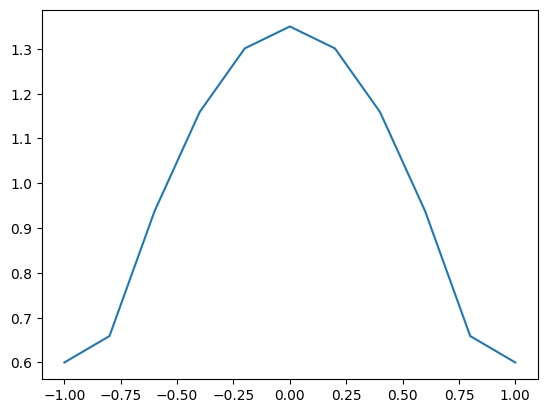

In [167]:
plt.plot(t_range, norms)
# plt.plot(t_range, np.ones_like(t_range))
plt.show()

In [168]:
t_range[norms < 1]

array([-1. , -0.8, -0.6,  0.6,  0.8,  1. ])

In [174]:
t_0 = 1
x = np.linalg.solve(np.identity(len(B(t_0))) - B(t_0), c)
print(x)

[1.69117647 1.73529412 1.67647059]


In [175]:
print(B(1)@x + c)

[1.69117647 1.73529412 1.67647059]
